<a href="https://colab.research.google.com/github/aavella77/fft/blob/main/fft_learn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Fast Fourier Transform (FFT) Algorithm Tutorial
By [Alejandro Avella](https://aavella77.github.io/)

August 6th, 2022

The Fourier Transform is a mathematical formula that allows to convert a time series from the time domain to the frequency domain.  See figure below, where we have a signal that looks random in the time domain, but it is just composed of 3 sine waves in the frequency domain. I have studied this mathematically in my undergrad and master studies, but never studied the Fast Fourier Transform (FFT) algorithm used by many applications.

<img src="https://raw.githubusercontent.com/aavella77/fft/main/ftt-time-frequency.jpeg" width=350>

**Figure 1 - Time and Frequency domains (source: [Online Book from Berkeley](https://pythonnumericalmethods.berkeley.edu/notebooks/chapter24.00-Fourier-Transforms.html))**

I was motivated to study the FFT algorithm when I watched a [video](https://www.youtube.com/watch?v=h7apO7q16V0) that showed the implementation is recursive and can be implemented in about 10 lines of Python code.  There are many things that we take for granted in today's world that are based on the FFT algorithm.  Some of the [applications](https://en.wikipedia.org/wiki/Fast_Fourier_transform#Applications) include Wifi, audio/video/image compression, GPS and celular networks just to name a few of them.

This notebook can be executed in [Google Colab](https://colab.research.google.com/?utm_source=scs-index) and explores the Fast Fourier Algorithm as described the [1965 paper](https://github.com/aavella77/fft/blob/main/FFT-1965-paper-cooley-tukey.pdf) by James Cooley and John Tukey, but the idea actually can be traced back to Gauss’s unpublished work in 1805. I used the implementation suggested by the Reducible's online YouTube videos.

**References:**
* Reducible: The Fast Fourier Transform (FFT): Most Ingenious Algorithm Ever? [video](https://www.youtube.com/watch?v=h7apO7q16V0)
* Reducible: FFT implementation Walkthrough [video](https://www.youtube.com/watch?v=Ty0JcR6Dvis)
* Python Numerical Methods from University of California, Berkeley, Chapter 24 on the Fourier Transform available [here](https://pythonnumericalmethods.berkeley.edu/notebooks/chapter24.00-Fourier-Transforms.html)
* 3Blue1Brown Fourier Transform [video](https://www.youtube.com/watch?v=spUNpyF58BY)



**Libraries used:**
*   [Numpy](https://numpy.org/)
*   [Matplotlib](https://matplotlib.org/)



In [1]:
import numpy as np
import matplotlib.pyplot as plt

# print only 2 decimals
np.set_printoptions(precision = 2, suppress = True)

## Fast Fourier Transform (FFT) algorithm in Python

We first introduce the algorithm in Python and try to reverse engineer what it does by executing in this Google Colab Notebook.  First, we try with an input of 4 polynomial coefficients for a polynomial grade 3. Then, we run it a series of samples of sample time domain signal and run plots in the frequency domain.  Finally, we give some insights on why the algorithm works.

In [15]:
def FFT(P):
    """
    A recursive implementation of the
    1D Cooley-Tukey FFT, using 
    Reducible's YouTube video implementation as a reference.
    """
    # P - [po, p1,... pn-1] coefficient representation
    n = len(P) # n is a power of 2
    if n == 1:
        return P 
    y_even = FFT(P[::2])
    y_odd = FFT(P[1::2])  
    y = [0] * n
    for k in range(int(n/2)):
        w_k = np.exp(2j*np.pi*k/n) 
        y[k] = y_even[k] + w_k*y_odd[k]
        y[k + int(n/2)] = y_even[k] - w_k*y_odd[k]
    return y    

In [16]:
X = FFT([5, 3, 2, 1])
print("The FFT is: ",X)

The FFT is:  [(11+0j), (3+2j), (3+0j), (3-2j)]


Some notes regarding the implementation of FFT in Python:
* The input of the FFT function is a list of samples in the time domain **x**.  FFT function returns **X** (note that it is capital letters) that it is the representation in the frequency domain.  **x** is a list of float numbers (real numbers), while the algorithm returns a list of complex numbers **X**.
* FFT is a recursive algorithm.  For a recursive algorithm, the first thing you need to discover is the base case, which in this case when N (the number of samples) is equal to 1. For this case, we just return x with size 1.
* We start finding N as length of the time domain amplitude samples **x**. Initially, is the number of samples, which in our case is 4 for the polynomial and 32 for the signal in the time domain.
* We use [Python slicing](https://www.pythontutorial.net/advanced-python/python-slicing/), in particular with this format: **seq[start|stop|step]**
> * x[::2] start at zero sample, end at last of the samples, with step 2 (every other samples). Gives even samples from the signal in the time domain (x).
> * x[1::2] Starts at first sample (odd), end at last sample, with step 2 (every other sample). Gives odd samples from the signal in the time domain (x). 
* [Numpy exp](https://numpy.org/doc/stable/reference/generated/numpy.exp.html): Calculate the exponential of all elements in the input array.
* [Numpy pi](https://numpy.org/doc/stable/reference/constants.html): The constant 3.1416 

* The complex number i (square root of -1) is represented as j in Python

Note: The following cell just adds print statements to be able to follow the runs.



In [ ]:
# We add some prints to follow the recursive execution (same function as above).
def FFT(x):
    """
    A recursive implementation of 
    the 1D Cooley-Tukey FFT, the 
    input should have a length of 
    power of 2. 
    """
    N = len(x)
    
    if N == 1:
        print("\n>>>> N: 1 (base case) returning x: ", x)
        return x
    else:
        print("\nN: ", N)
        print("\nx: ", x)

        print("\nx_even samples in time domain: ", x[::2])
        X_even = FFT(x[::2])
        print("\nX_even in frequency domain after FFT recursive call: ", X_even)
        
        print("\nx_odd samples in time domain: ", x[1::2])
        X_odd = FFT(x[1::2])
        print("\nX_odd in frequency domain after FTT recursive call: ", X_odd)       
        
        factor = \
          np.exp(-2j*np.pi*np.arange(N)/ N)

        print("\nfactor: ", factor)  
        print("\nfor N: ", N)
        print("\nfactor[:int(N/2)]", factor[:int(N/2)])
        print("\nfactor[int(N/2):]", factor[int(N/2):])

        X = np.concatenate(\
            [X_even+factor[:int(N/2)]*X_odd,
             X_even+factor[int(N/2):]*X_odd])

        print("\nX_even+factor[:int(N/2)]*X_odd = \n" + str(X_even) + "\n + \n" + str(factor[:int(N/2)]) + "\n * \n" + str(X_odd) + "\n = \n" + str(X_even+factor[:int(N/2)]*X_odd))
        print("\nX_even+factor[int(N/2):]*X_odd = \n" + str(X_even) + "\n + \n" + str(factor[int(N/2):]) + "\n * \n" + str(X_odd) + "\n = \n" + str(X_even+factor[int(N/2):]*X_odd))

        print("\n>>>> Returning X: \n", X)
        return X

# FFT example: Unraveling the recursion
We start by executing the FFT to a set of 4 samples to understand how the algorithm works.  The coefficients of a polynomial of grade 3 are [5,3,2,1].  These are similar to the samples in the time domain for input signal as described above. Click on the play button below and watch the [Reducible video](https://www.youtube.com/watch?v=Ty0JcR6Dvis) and follow the output of the algorithm below. The output of the algorithm is [11, 3+2j, 3, 3-2j]

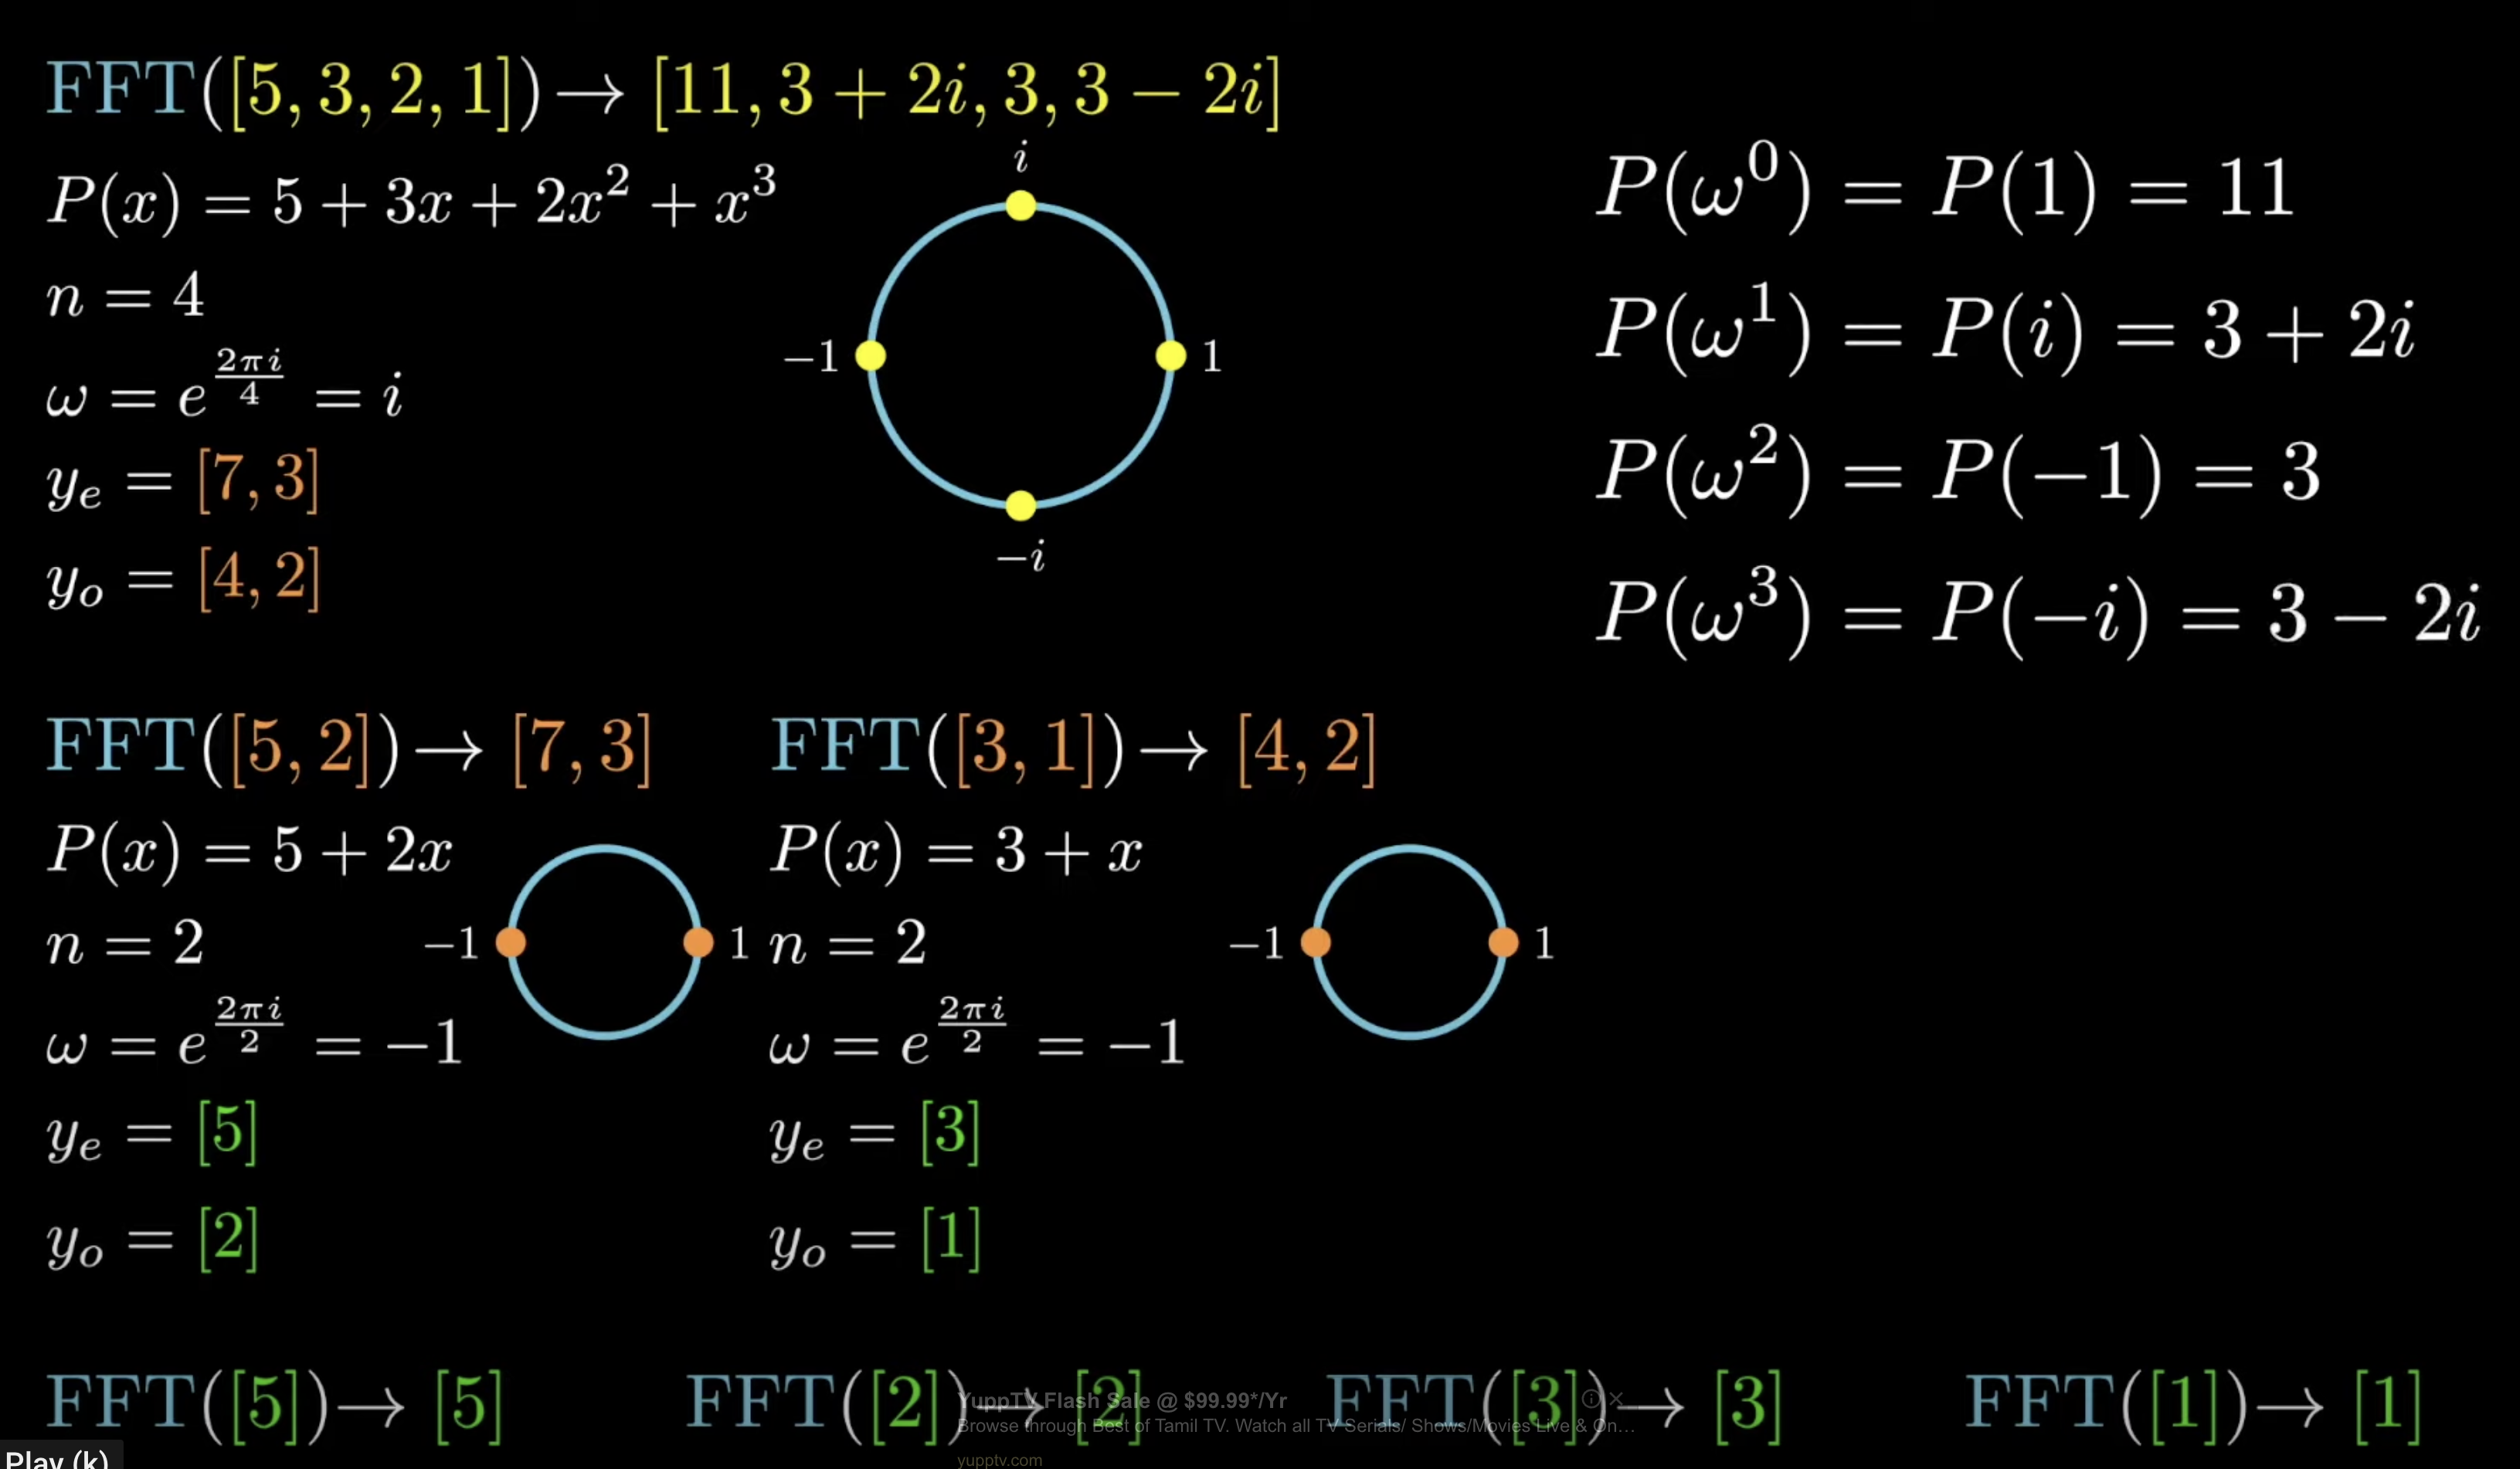

**Figure 2 - Sample recursion evaluation with 4 input values (Source: Reducible video)**

In [ ]:
X1=FFT([5,3,2,1])


N:  4

x:  [5, 3, 2, 1]

x_even samples in time domain:  [5, 2]

N:  2

x:  [5, 2]

x_even samples in time domain:  [5]

>>>> N: 1 (base case) returning x:  [5]

X_even in frequency domain after FFT recursive call:  [5]

x_odd samples in time domain:  [2]

>>>> N: 1 (base case) returning x:  [2]

X_odd in frequency domain after FTT recursive call:  [2]

factor:  [ 1.+0.j -1.-0.j]

for N:  2

factor[:int(N/2)] [1.+0.j]

factor[int(N/2):] [-1.-0.j]

X_even+factor[:int(N/2)]*X_odd = 
[5]
 + 
[1.+0.j]
 * 
[2]
 = 
[7.+0.j]

X_even+factor[int(N/2):]*X_odd = 
[5]
 + 
[-1.-0.j]
 * 
[2]
 = 
[3.-0.j]

>>>> Returning X: 
 [7.+0.j 3.-0.j]

X_even in frequency domain after FFT recursive call:  [7.+0.j 3.-0.j]

x_odd samples in time domain:  [3, 1]

N:  2

x:  [3, 1]

x_even samples in time domain:  [3]

>>>> N: 1 (base case) returning x:  [3]

X_even in frequency domain after FFT recursive call:  [3]

x_odd samples in time domain:  [1]

>>>> N: 1 (base case) returning x:  [1]

X_odd in frequency d

# FFT sample run for the time domain signal

## Signal in the time domain:
We study a signal **x** composed of 3 sine waves:

> * Amplitude 3 Volts and frequency 1 Hz
> * Amplitude 1 Volts and frequency 4 Hz
> * Ampliture 0.5 Volts and frequency 7 Hz

This produces an interesting waveform in the time domain, which could represent the voice of a person in the time domain.  We would like to apply the Fast Fourier Transform (FFT) to find the representation in the frequency domain.

We sample this compound signal 32 times in one second (sampling rate = sr), which produces a sampling interval (1 sec / sr) of 0.03 secs.  We choose a convenient sampling rate which is a power of 2 which helps in the FFT algorithm.  Play with with different sr (e.g 128, 256, ...) and check the number of samples and precision of the graph produced.

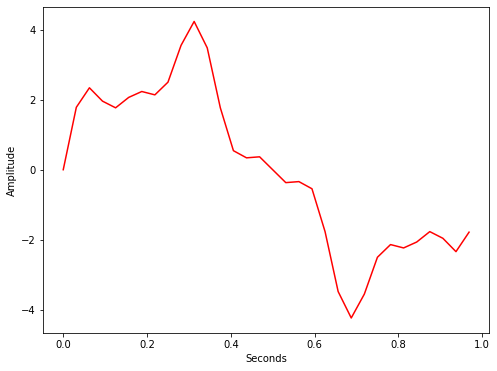

Series in the time domain:

Signal x amplitudes in Volts:
 [ 0.    1.78  2.34  1.96  1.77  2.07  2.23  2.14  2.5   3.55  4.23  3.48
  1.77  0.54  0.34  0.37  0.   -0.37 -0.34 -0.54 -1.77 -3.48 -4.23 -3.55
 -2.5  -2.14 -2.23 -2.07 -1.77 -1.96 -2.34 -1.78]

Time samples in seconds:
 [0.   0.03 0.06 0.09 0.12 0.16 0.19 0.22 0.25 0.28 0.31 0.34 0.38 0.41
 0.44 0.47 0.5  0.53 0.56 0.59 0.62 0.66 0.69 0.72 0.75 0.78 0.81 0.84
 0.88 0.91 0.94 0.97]


In [ ]:
# sampling rate
sr = 32
# sampling interval
ts = 1.0/sr
t = np.arange(0,1,ts)

freq = 1.
x = 3*np.sin(2*np.pi*freq*t)

freq = 4
x += np.sin(2*np.pi*freq*t)

freq = 7   
x += 0.5* np.sin(2*np.pi*freq*t)

plt.figure(figsize = (8, 6))
plt.plot(t, x, 'r')
plt.ylabel('Amplitude')
plt.xlabel('Seconds')

plt.show()
print("Series in the time domain:\n")
print("Signal x amplitudes in Volts:\n", x)
print("\nTime samples in seconds:\n", t)


In [ ]:
X=FFT(x)



N:  32

x:  [ 0.    1.78  2.34  1.96  1.77  2.07  2.23  2.14  2.5   3.55  4.23  3.48
  1.77  0.54  0.34  0.37  0.   -0.37 -0.34 -0.54 -1.77 -3.48 -4.23 -3.55
 -2.5  -2.14 -2.23 -2.07 -1.77 -1.96 -2.34 -1.78]

x_even samples in time domain:  [ 0.    2.34  1.77  2.23  2.5   4.23  1.77  0.34  0.   -0.34 -1.77 -4.23
 -2.5  -2.23 -1.77 -2.34]

N:  16

x:  [ 0.    2.34  1.77  2.23  2.5   4.23  1.77  0.34  0.   -0.34 -1.77 -4.23
 -2.5  -2.23 -1.77 -2.34]

x_even samples in time domain:  [ 0.    1.77  2.5   1.77  0.   -1.77 -2.5  -1.77]

N:  8

x:  [ 0.    1.77  2.5   1.77  0.   -1.77 -2.5  -1.77]

x_even samples in time domain:  [ 0.   2.5  0.  -2.5]

N:  4

x:  [ 0.   2.5  0.  -2.5]

x_even samples in time domain:  [0. 0.]

N:  2

x:  [0. 0.]

x_even samples in time domain:  [0.]

>>>> N: 1 (base case) returning x:  [0.]

X_even in frequency domain after FFT recursive call:  [0.]

x_odd samples in time domain:  [0.]

>>>> N: 1 (base case) returning x:  [0.]

X_odd in frequency domain after 

## Frequency Domain Spectrum Plots
Note that the frequencies obtained are 1, 4 and 7 Hz and the amplitudes are 3, 1 and 0.5 Volts. In the time domain, it may be hard to see this pattern of 3 composing frequencies, but in the time domain the composing signals are very easy to identify. It just beatiful!



X returned by FFT fucntion is: 
 [-0. +0.j -0.-48.j -0. -0.j -0. +0.j -0.-16.j  0. +0.j  0. -0.j -0. -8.j
  0. -0.j  0. -0.j  0. +0.j  0. +0.j  0. -0.j  0. +0.j  0. +0.j  0. +0.j
 -0. -0.j  0. +0.j  0. -0.j  0. -0.j  0. +0.j  0. -0.j  0. -0.j  0. +0.j
  0. +0.j -0. +8.j  0. +0.j  0. +0.j -0.+16.j -0. -0.j -0. +0.j -0.+48.j]
N: 32
n: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31]


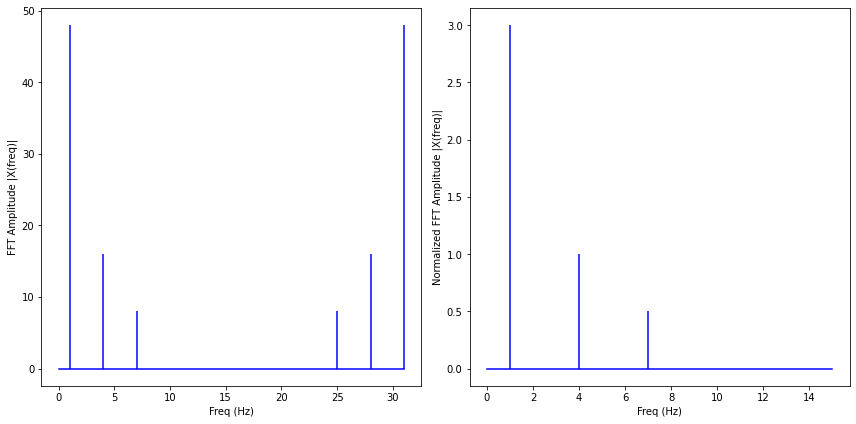

In [ ]:
# calculate the frequency
print("X returned by FFT fucntion is: \n", X)
N = len(X)
print("N:", N)
n = np.arange(N)
print("n:", n)
T = N/sr
freq = n/T 

plt.figure(figsize = (12, 6))
plt.subplot(121)
plt.stem(freq, abs(X), 'b', \
         markerfmt=" ", basefmt="-b", use_line_collection=True)
plt.xlabel('Freq (Hz)')
plt.ylabel('FFT Amplitude |X(freq)|')

# Get the one-sided specturm
n_oneside = N//2
# get the one side frequency
f_oneside = freq[:n_oneside]

# normalize the amplitude
X_oneside =X[:n_oneside]/n_oneside

plt.subplot(122)
plt.stem(f_oneside, abs(X_oneside), 'b', \
         markerfmt=" ", basefmt="-b", use_line_collection=True)
plt.xlabel('Freq (Hz)')
plt.ylabel('Normalized FFT Amplitude |X(freq)|')
plt.tight_layout()
plt.show()

# FFT explanation
There are four major clever ideas in FFT (Evaluation).

1. Polynomial multiplication in value represenation: A polynomial can be either represented by its coeficients (Coefficient representation) or by pair value pairs (x, p(x)) (Value representation). All FFT does is to go from coefficient to value representation.
2. Evaluation at +/- pairs, but recursion does not work, unless we expand to the complex domain.
3. Evaluation points at nth roots of unity => FFT
4. Inverse FFT (Interpolation) can be solved with a minor change on w variable.

**Figure 3 - FFT is going from Polynomial Coefficient representation to Value representation (source: Reducible video)**

**Figure 4 - Evaluation an Nth points (Source: Reducible video)**

**Figure 5 - FFT implemenation Walktrough (Source: Reducible video)**